## I. INTRODUCTION

“Un chatbot es un programa informático que utiliza inteligencia artificial (IA) y procesamiento del lenguaje natural (PNL) para comprender las preguntas de los clientes y automatizar las respuestas, simulando una conversación humana. – (“¿Qué es un chatbot?”) A medida que el campo de la IA continúa creciendo rápidamente, los chatbots se han vuelto cada vez más refinados y ahora son capaces de aprender de grandes volúmenes de datos y mejorar sus habilidades conversacionales con el tiempo. Esto ha dado lugar a una nueva sección de chatbots conocida como chatbots basados en ML (Machine Learning) que no están preprogramados con reglas, sino que aprenden de grandes cantidades de datos y responden a las entradas del usuario analizando dichos datos. Puede encontrar una buena guía sobre chatbots basados en ML en (IBM Watson Advertising, “The ultimate Guide to machine-learning chatbots and conversacional AI”, 2022).[1] 

Hoy en día, los chatbots se utilizan en diversos ámbitos, como el servicio de atención al cliente, la atención sanitaria e incluso la educación [2] (Brandtzaeg, 2017). Una aplicación de chatbot común específica es aquella en la que se utilizan para brindar soporte para los productos de una empresa, por lo que requiere menos participación humana en la atención al cliente. La base de muchos chatbots modernos es el modelo de lenguaje grande (LLM), un modelo que procesa la entrada del lenguaje natural y genera palabras basadas en los datos vistos. Su impacto y capacidades se analizan en el artículo [3](Alex Tamkin, “Understanding the Capabilities, Limitations, and ocietal Impact of Large Language Models”, 2021).

Si bien los LLM han hecho que los chatbots sean muy humanos en sus interacciones con los clientes, también dieron lugar a un **nuevo problema conocido como alucinación** (Nabeel Ahmed, febrero de 2022). La alucinación es un fenómeno en el que un modelo de IA crea resultados que no son reales, no coinciden con ningún dato con el que se haya entrenado el algoritmo o no siguen ningún otro patrón discernible. Por lo tanto, es importante emplear una combinación de técnicas de evaluación para evaluar la presencia de alucinaciones en modelos de lenguaje grandes, especialmente cuando se usan en el contexto de chatbots. Con la creciente popularidad de los chatbots, es importante desarrollar métodos para evaluar su desempeño. Un punto de referencia de chatbot es un marco de **evaluación estandarizado** que se utiliza para evaluar el rendimiento y las capacidades de los sistemas de chatbot. Implica definir un conjunto de tareas o criterios que el chatbot debe cumplir y luego medir su desempeño en función de esas tareas o criterios. Hay dos factores importantes a considerar al comparar un chatbot: **precisión y utilidad**. La precisión del chatbot es una medida de qué tan correcto es en términos de hechos, mientras que la utilidad mide en qué medida el chatbot satisface las necesidades del usuario. No es que, mientras que antes una respuesta aparentemente útil casi siempre fuera útil, con el despliegue de chatbots con tecnología LLM propensos a alucinaciones, ese ya no es el caso; Es posible que un chatbot alucine con una respuesta que no esté respaldada por ninguno de los documentos disponibles y que pueda ser completamente errónea. Por lo tanto, para evaluar con éxito el desempeño del chatbot, se deben considerar ambos factores.

Existen varios tipos de pruebas comparativas de chatbot, cada uno con sus propias ventajas y desventajas. Algunos ejemplos de tales puntos de referencia se analizan en [4] (Wang, 2022). Un ejemplo de una categoría de benchmarks de chatbot son aquellos que comparan la respuesta a una pregunta de un chatbot con la generada por un humano. Si bien existen otros puntos de referencia, como los puntos de referencia de resumen, los puntos de referencia de recuperación de información y más, dichos puntos de referencia proporcionan **la mejor opción para una evaluación centrada en el usuario, ya que enfatiza la perspectiva del usuario**. Inspirándonos en esta categoría, proponemos el Chatbot Benchmark de extremo a extremo (E2E) que compara la respuesta proporcionada por el chatbot con una respuesta humana experta (también conocida como respuesta dorada) utilizando ciertas métricas de similitud semántica que intentan comparar **"significados” de cada respuesta**, en lugar de simplemente comparar sus palabras exactas, que es el estado actual del arte (SOTA) en evaluación comparativa. El benchmark E2E también mide todos los factores de optimización mencionados anteriormente para una evaluación exitosa. En general, el punto de referencia E2E proporciona un enfoque estandarizado y centrado en el usuario y promueve la relevancia en el mundo real. Sin embargo, necesita un conjunto de respuestas de oro. En este artículo, proponemos que el aspecto de similitud semántica del punto de referencia E2E se mida utilizando la medida de similitud del coseno entre sus correspondientes incrustaciones de texto. Este artículo analiza el E2E Chatbot Benchmar y cómo mejora la evaluación de los chatbots, en comparación con otra alternativa SOTA bien utilizada, las puntuaciones ROGUE.

## II. TRABAJO RELACIONADO

Las pruebas de salida del chatbot implican dar entradas al chatbot y analizar los resultados proporcionados por el chatbot. El análisis se realiza para obtener información sobre el chatbot y medir varias métricas relevantes, como la relevancia, la integridad, la precisión y la recuperación. Los investigadores han utilizado varias métricas para evaluar el rendimiento de los chatbots que incluyen, entre otras, el uso de puntos de referencia y métricas como GLUE, BLEU, perplejidad, puntuación ROUGE y evaluación humana. En la siguiente sección exploraremos las diversas métricas. Los chatbots deben ser precisos, relevantes y útiles para satisfacer las necesidades de los usuarios. La precisión es indicativa de cuántas respuestas correctas es capaz de proporcionar el chatbot; la relevancia generalmente se mide con la ayuda de la precisión y el recuerdo. La perplejidad es una métrica intrínseca comúnmente utilizada para la evaluación de cualquier modelo de lenguaje, se usa para evaluar qué tan bien un modelo predice muestras de texto, es decir, se usa para medir el grado de incertidumbre cuando un modelo genera un nuevo token, por lo tanto, las puntuaciones de perplejidad tienen valores más bajos son indicativos de un mejor desempeño del modelo. Alex Wang y otros. (2019) en su artículo de conferencia publicado en ICLR presentaron otro punto de referencia: el punto de referencia de Evaluación de comprensión general del lenguaje (GLUE) para la evaluación del modelo de lenguaje que se utiliza para evaluar las capacidades generales de comprensión del lenguaje de un modelo de lenguaje. Consiste en una colección de diversas tareas para NLU (Comprensión del lenguaje natural) junto con sus propios conjuntos de datos y métricas de evaluación. Intenta proporcionar un marco único para evaluar el modelo en varias tareas; sin embargo, hay críticas de que no abarca toda la gama de tareas. Se ha constatado la falta de un conjunto de datos diverso y de evaluaciones multilingües. El suplente de evaluación bilingüe (BLEU) [Kishore Papineni et al. (2002)] es otra métrica comúnmente utilizada para la evaluación de la traducción automática de un texto de un idioma a otro. BLEU determina la precisión de los n-gramas individuales contando el recuento de n-gramas coincidentes entre las traducciones candidata y de referencia. Además, tiene en cuenta la concisión de la traducción candidata en relación con las referencias. Estas puntuaciones de precisión se combinan armoniosamente a través de una media geométrica ponderada, en la que la penalización por brevedad juega un papel importante, lo que da como resultado la puntuación BLEU final. BLEU fue una de las primeras métricas en afirmar una alta correlación con el juicio humano y sigue siendo una de las métricas más populares y económicas para la evaluación de traducciones; sin embargo, no es comparable entre diferentes conjuntos de datos y no tiene en cuenta la inteligibilidad o la corrección gramatical. ROUGE o Suplente orientado a la recuperación para evaluación de Gisting se utiliza para evaluar las capacidades de resumen de texto del modelo en el que el objetivo es generar un resumen conciso de un texto más largo. La puntuación ROUGE mide la similitud entre el resumen generado por máquina y los resúmenes de referencia utilizando n-gramas superpuestos, secuencias de palabras que aparecen tanto en el resumen generado por máquina como en los resúmenes de referencia. Los n-gramas más comunes utilizados son unigramas, bigramas y trigramas. La puntuación ROUGE es importante ya que brinda flexibilidad para usar n-gramas según los requisitos; sin embargo, es posible que no capture completamente el significado semántico o la coherencia del resumen, lo cual es importante para la calidad del resumen. La evaluación humana también es un criterio muy importante en el que cualquier modelo de lenguaje o chatbot debe sobresalir; sin embargo, puede ser muy subjetivo y propenso a sesgos; además, la evaluación humana a gran escala puede ser muy costosa y consumir mucho tiempo.

## III. BENCHMARKS EN RELACIÓN CON LOS CHATBOTS

Esta figura ofrece una idea de un chatbot típico diseñado para la recuperación de información desde un gráfico de conocimiento hasta las consultas naturales del usuario que (opcionalmente) posteriormente se resumen en un LLM. También proporciona diferentes puntos de referencia que se pueden construir para aprovechar las diferentes etapas

 FIG. 1. Un chatbot típico de LLM para responder preguntas basadas en un corpus de documentos y los diversos puntos de referencia que se pueden utilizar para evaluarlo.
 
El punto de referencia E2E utiliza un conjunto de "Respuestas de oro" para medir con precisión el rendimiento del chatbot. Las respuestas doradas son un conjunto de respuestas predefinidas con las que se comparan las respuestas del chatbot. A través de este proceso, podemos evaluar el desempeño del chatbot. Las respuestas de oro también vienen con su propio conjunto de ventajas y desventajas. Estas respuestas deben definirse 3 antes del tiempo de ejecución (manualmente) y, por lo tanto, pueden resultar tediosas, consumir mucho tiempo y no proporcionar comentarios en tiempo real. Sin embargo, varias ventajas hacen que las respuestas doradas sean un método de evaluación extremadamente útil, como la coherencia, la evaluación estandarizada y el suministro de información vital para mejorar el rendimiento del chatbot. El punto de referencia E2E tiene como objetivo simular escenarios de la vida real y evaluar el rendimiento del chatbot en el manejo de diversas consultas de los usuarios. Se crea una combinación de objetividad y subjetividad mezclando métricas como exactitud, precisión, etc., y evaluadores humanos que proporcionan calificaciones y comentarios subjetivos.

Así, el benchmark proporciona una experiencia basada en el usuario, ya que son ellos quienes evalúan el desempeño del chatbot en base a criterios como relevancia, corrección, etc. A través de estos métodos el benchmark E2E considera ambos factores involucrados en el benchmarking del chatbot, la precisión y utilidad y mide con éxito todas las optimizaciones. Otros métodos de evaluación comparativa tienen sus ventajas y desventajas. El punto de referencia de Relevancia también crea una experiencia centrada en el usuario y no requiere la ayuda de respuestas de oro; sin embargo, no tiene en cuenta las alucinaciones, que es el mayor inconveniente de los modelos de lenguaje grandes. El punto de referencia de resumen no sufre problemas de alucinaciones y no requiere respuestas de oro, pero tiene un enfoque limitado y no es preciso al medir los aspectos importantes de la eficacia del LLM, como la comprensión del lenguaje, la generación de respuestas o la retención del contexto. Los dos puntos de referencia anteriores también son métodos de aprendizaje no supervisados.

El punto de referencia de recuperación de información sirve como punto de referencia de búsqueda en lugar de punto de referencia de chatbot. Teniendo en cuenta todos estos factores, el punto de referencia E2E demuestra ser la mejor manera de evaluar el rendimiento del chatbot en este escenario. En este artículo, presentamos una técnica adicional para la evaluación comparativa E2E, más allá de las métricas basadas en palabras/n-gramas como ROGUE y BLEU. Es decir, proponemos que si medimos la similitud semántica entre las respuestas doradas y las respuestas generadas por el chatbot, constituyen una métrica más sensible para medir cualquier mejora o degradación en el sistema del chatbot. Específicamente en este artículo comparamos tres puntos de referencia diferentes, los dos primeros: uno que usa Universal Sentence Encoder (USE) (Daniel Cer, 2018)[5] como incrustación semántica, otro que usa Sentence Transformers (ST) (Nils Reimers, 2019) [6] como una incrustación semántica, y los comparamos con los diversos componentes de ROGUE como una palabra heredada o una métrica basada en n-gramas. Para realizar el análisis se han utilizado tres bibliotecas, a saber:
1. Codificador universal de oraciones
2. Transformador de oraciones
3. ROUGE (suplente orientado al recuerdo de Gisting Evaluación)

Como se analizó anteriormente, este documento se centrará principalmente en el punto de referencia E2E en comparación con otros métodos. En las siguientes secciones del artículo se discutirán los resultados de esta evaluación.

## IV. RESULTADOS

Proponemos aquí un punto de referencia de extremo a extremo (E2E) basado en similitud semántica para evaluar el rendimiento de los chatbots. Esta evaluación comparativa compara y verifica las respuestas del chatbot con una "respuesta de oro" proporcionada por un experto humano utilizando una medida de similitud semántica basada en incrustaciones de texto. También comparamos el resultado que obtenemos del E2E Benchmark construido de este modo con un enfoque más tradicional de comparar las puntuaciones ROGUE basadas en palabras, bigramas y ngramas calculadas en los mismos pares de "respuesta dorada" frente a respuestas de chatbot. Utilizamos tres bibliotecas para realizar nuestros análisis que incluían
1. Codificador universal de oraciones
2. Transformador de oraciones
3. ROUGE

Antes de continuar con el análisis, nos gustaría dar una breve idea sobre Universal Sentence Encoder y Sentence Transformers.

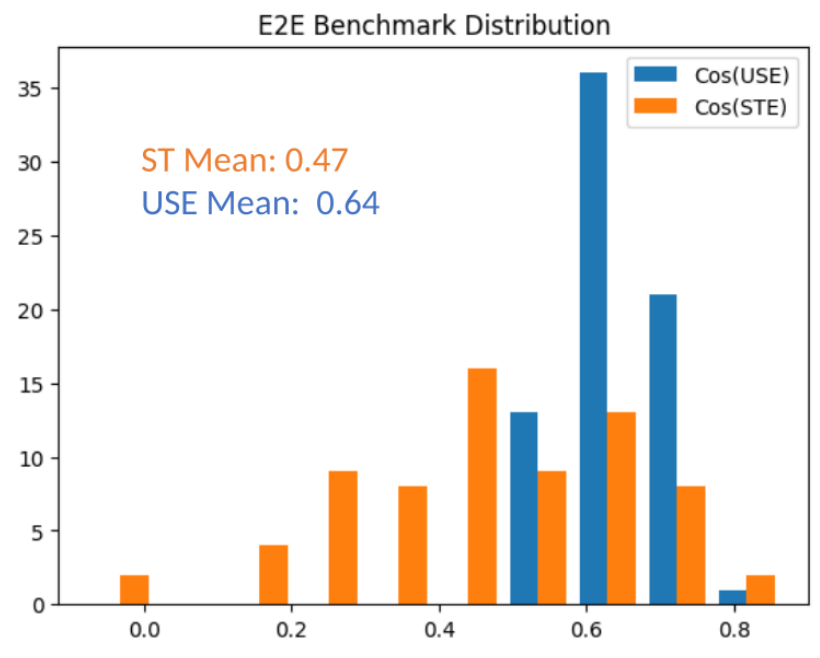

<center> FIG. 2. Resultados de E2E Benchmark con el uso de similitud de coseno sobre incrustaciones obtenidas de Golden Answer frente a la respuesta generada por Chatbot, utilizando incrustaciones de Sentence Transformer (ST) y Universal Sentence Encoder (USE), respectivamente. Resultado obtenido de un chatbot de soporte de producto. </center>

Universal Sentence Encoder (USE) es un modelo previamente entrenado desarrollado por Google que convierte oraciones en representaciones vectoriales de longitud fija o incrustaciones, capturando sus significados semánticos.

Sentence Transformer (ST) es una arquitectura modelo diseñada para producir incrustaciones de oraciones de alta calidad, que representan oraciones como vectores. A diferencia de las incrustaciones de palabras tradicionales, estas incrustaciones de oraciones consideran el contexto completo y el significado de las oraciones. Inspirándose en arquitecturas de transformadores como BERT, el modelo Sentence Transformer utiliza técnicas de preentrenamiento y ajuste.

Para nuestros propósitos, evaluamos el rendimiento de cuatro chatbots de soporte de productos disponibles públicamente creados por una gran empresa de equipos de red para ayudar a sus usuarios empresariales a obtener respuestas a preguntas basadas en su documentación.

Para ambas incrustaciones, tomamos una respuesta dorada (G) y la respuesta generada por el chatbot (A), luego aplicamos la incrustación X = F(T) donde F puede ser un codificador de oraciones universal o un transformador de oraciones en nuestro texto T. - lo que nos da que XG y XA son vectores n-dimensionales generados como resultado de la aplicación de las operaciones. Luego calculamos las similitudes de cosenos entre XG y XA. La similitud del coseno se define como el producto escalar de dos vectores, dividido por el producto de sus magnitudes.


---

\begin{equation} 
    S(G,A) = \frac{X_G · X_A}{|X_G| |X_A|}
\end{equation}

En el caso de usar USE como la operación de incrustación, generalmente queda un sesgo constante de 0.5 en nuestra respuesta final debido a las características inherentes de los vectores USE. Calculamos las similitudes coseno tanto para Universal Sentence Encoder como para Sentence Transformer, y para ROUGE utilizamos la precisión y la recuperación para verificar las palabras y n-gramas incluidos en nuestras respuestas generadas al compararlos con las respuestas humanas expertas. Como se muestra en la Figura 2, el chatbot funciona razonablemente bien tanto con Universal Sentence Encoder como con Sentence Transformer, con una media de USE de aproximadamente 0.64 y una media de ST de aproximadamente 0.47. También calculamos la correlación entre las salidas de ambos métodos, que se muestra en la Figura 3.

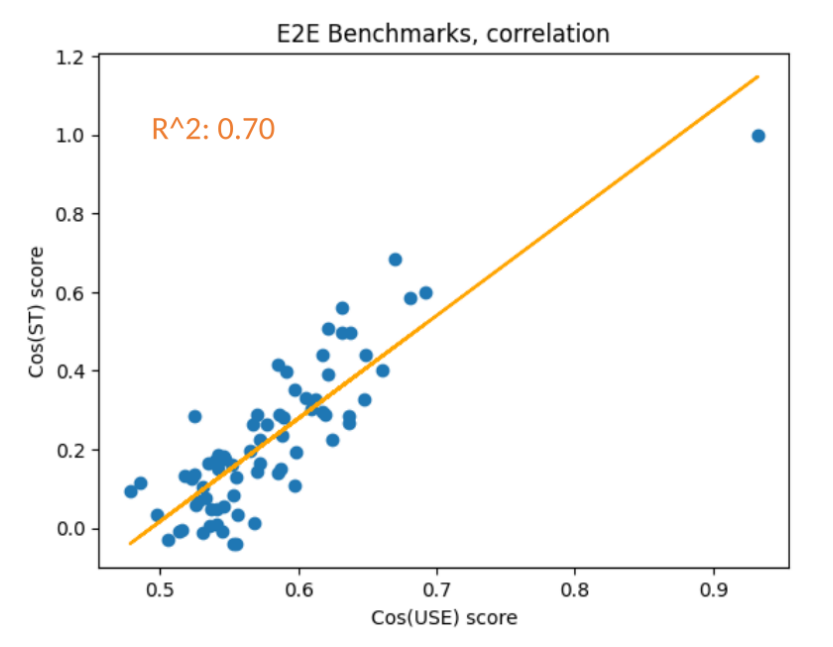

FIG. 3. Correlación entre los resultados del Benchmark E2E con el uso de Similitud Coseno sobre incrustaciones de Sentence Transformer (ST) y Universal Sentence Encoder (USE) del mismo chatbot de soporte de productos.

Calculamos los puntajes R^2 entre la similitud coseno de Sentence Transformer y Universal Sentence Encoder para evaluar la similitud entre los modelos de nuestro chatbot, lo que nos da un impresionante 0.7, lo que indica que los modelos funcionan de manera bastante similar y tienen respuestas muy similares a las respuestas proporcionadas por expertos.

A continuación, centramos nuestra atención en los puntajes ROUGE. ROUGE1 o puntaje ROUGE a nivel de palabra que evalúa la calidad de la respuesta en función de la superposición de unigramas entre las respuestas proporcionadas por el chatbot. ROUGE-1 es útil ya que captura las palabras clave, pero no tiene en cuenta el orden o la estructura de las palabras. También podemos utilizar la métrica (1-precisión) para obtener una estimación de la "alucinación" que tiene el chatbot. El gráfico a continuación muestra los puntajes ROUGE-1 cuando probamos las respuestas de nuestro chatbot frente a las respuestas de expertos:

FIG. 4. Precisión vs. Recuperación para los puntajes ROUGE-1 entre Respuestas Doradas vs. Respuestas de Chatbot del mismo chatbot de soporte de productos.

Los resultados son muy interesantes. No muestran una correspondencia directa entre la recuperación y la precisión a nivel de unigramas; sin embargo, también podemos utilizar otras formas de ROUGE para comprender mejor el modelo: ROUGE-2 (bigramas) y ROUGE-LCS (secuencia común más larga), cuya recuperación y precisión se muestran en la Figura 5 y la Figura 6, respectivamente.

FIG. 5. Precisión vs. Recuperación para los puntajes ROUGE-2 entre Respuestas Doradas vs. Respuestas de Chatbot del mismo chatbot de soporte de productos.

FIG. 6. Precisión vs. Recuperación para los puntajes ROUGE-1 entre Respuestas Doradas vs. Respuestas de Chatbot del mismo chatbot de soporte de productos.

Para bigramas, observamos que la mayoría de las recuperaciones mejoran en comparación con el nivel de unigramas, sin embargo, la precisión fue mejor cuando utilizamos ROUGE-1, ya que captura una palabra a la vez.

### V. RESPUESTAS DORADAS VS. PALABRAS ALEATORIAS: UN EJEMPLO NEGATIVO

También calculamos la similitud coseno como se describe en las secciones anteriores, pero esta vez entre las respuestas doradas y palabras aleatorias para evaluar mejor qué tan bien funcionan nuestros experimentos en relación con una muestra aleatoria. Descubrimos que las métricas están completamente descorrelacionadas, con un puntaje R^2 de 0. Sin embargo, también observamos que **Sentence Transformer** supera a USE en este caso, ya que USE aún obtiene una similitud coseno de aproximadamente 0.5, mientras que Sentence Transformers proporcionan una similitud coseno de 0. La imagen a continuación muestra los puntajes coseno calculados entre respuestas doradas y palabras aleatorias.

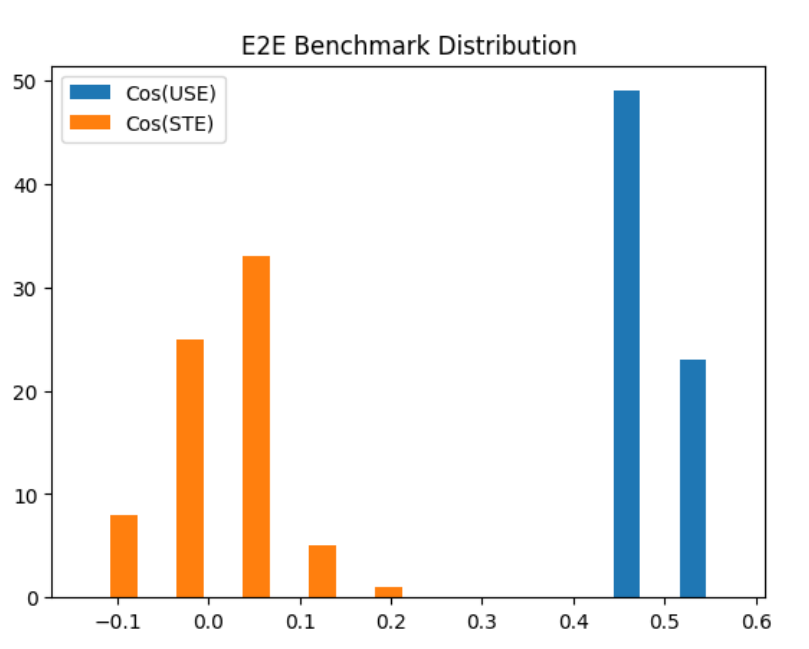

FIG. 7. Resultados del Benchmark E2E con el uso de la Similitud Coseno sobre incrustaciones obtenidas de la Respuesta Dorada vs. palabras aleatorias, utilizando tanto las incrustaciones de Sentence Transformer (ST) como las de Universal Sentence Encoder (USE), respectivamente.

Incluso calculamos la correlación entre las métricas, como se mencionó anteriormente, cuyos resultados se muestran en la Figura 7.

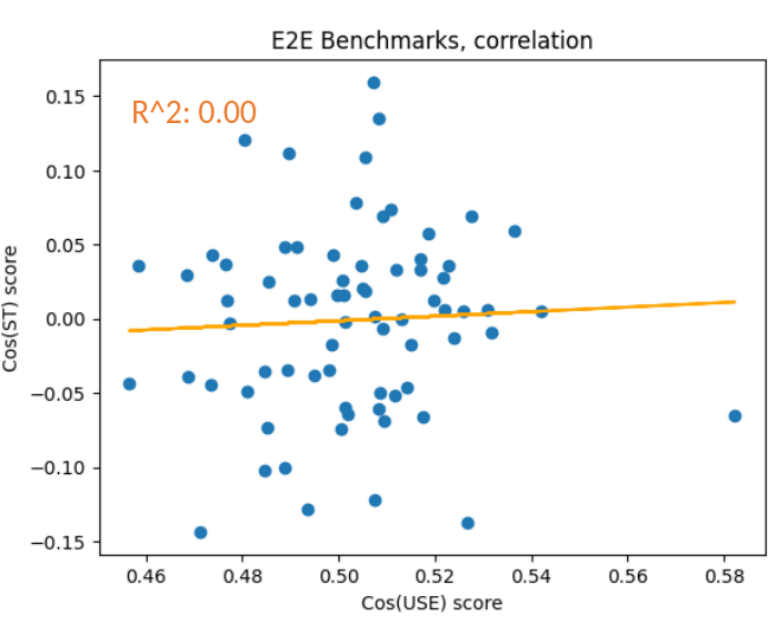

FIG. 8. Correlación entre los resultados del Benchmark E2E con el uso de la Similitud Coseno sobre incrustaciones de Sentence Transformer (ST) y Universal Sentence Encoder (USE) al comparar Respuestas Doradas vs. palabras aleatorias.

Como esperábamos, no hay correlación entre las métricas en este caso.


### VI. MEDICIÓN DE LA MEJORA EN EL CHATBOT: GPT-3 CON INGENIERÍA DE PROMPT

Se ha observado en la literatura que los chatbots basados en LLM pueden mejorarse mediante la utilización de prompts mejorados, lo que a menudo se llama ingeniería de prompts. El chatbot que utilizamos para nuestros experimentos utiliza GPT-3 y, como tal, es sensible a la ingeniería de prompts. Por lo tanto, comparamos los resultados del Benchmark E2E obtenidos utilizando prompts estándar con los resultados obtenidos después de utilizar prompts mejorados, utilizando los métodos descritos a continuación:

* 1.) Prompt estándar: "a partir de este texto:, ¿puedes responder la pregunta:?"
* 2.) Prompt mejorado: "rol": "sistema", "contenido": "Eres un experto en ingeniería de redes que ayuda a resumir el siguiente mensaje para responder una pregunta del operador de red que sigue al mensaje."

Los resultados E2E de estos experimentos se encuentran en las Figuras 9 y 10 respectivamente.

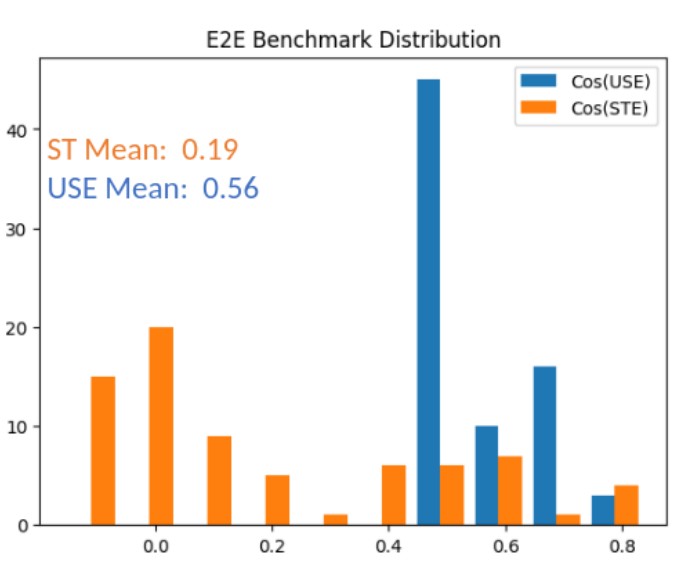

FIG. 9. Resultados del Benchmark E2E con el uso de la Similitud Coseno sobre incrustaciones obtenidas de la Respuesta Dorada vs. palabras aleatorias, utilizando tanto las incrustaciones de Sentence Transformer (ST) como las de Universal Sentence Encoder (USE), respectivamente, utilizando el Prompt Estándar.

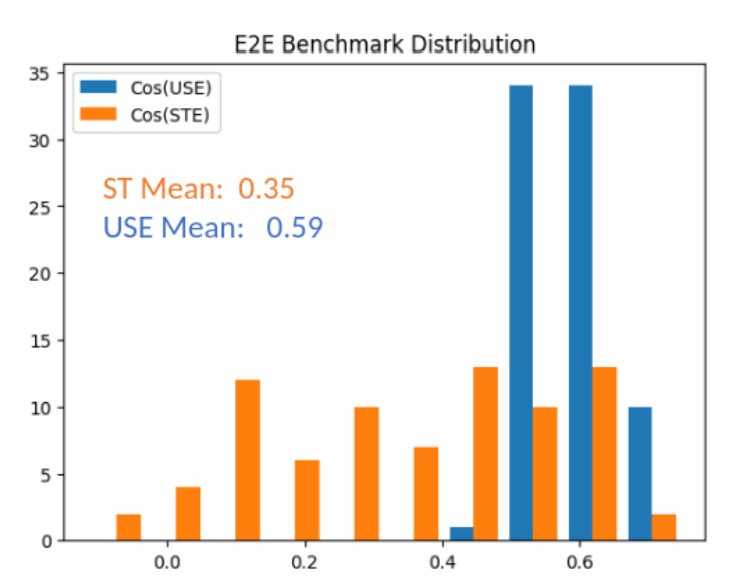

FIG. 10. Resultados del Benchmark E2E con el uso de la Similitud Coseno sobre incrustaciones obtenidas de la Respuesta Dorada vs. palabras aleatorias, utilizando tanto las incrustaciones de Sentence Transformer (ST) como las de Universal Sentence Encoder (USE), respectivamente, utilizando el Prompt Mejorado.

Observamos un aumento significativo en las salidas de Sentence Transformer en los prompts ingenierizados, lo que sugiere que es mucho más sensible a las modificaciones en la ingeniería de prompts en la consulta.

También verificamos el rendimiento del chatbot en relación con las métricas ROUGE, con prompts estándar y prompts mejorados. Los resultados del puntaje ROGUE-1 de estos experimentos se encuentran en las Figuras 11 y 12 respectivamente, mientras que los resultados del puntaje ROGUE-2 de estos experimentos se encuentran en las Figuras 13 y 14 respectivamente.

FIG. 11. Comparaciones de puntaje ROGUE-1 entre la Respuesta Dorada vs. Respuestas del Chatbot, utilizando el Prompt Estándar.

FIG. 12. Comparaciones de puntaje ROGUE-1 entre la Respuesta Dorada vs. Respuestas del Chatbot, utilizando el Prompt Mejorado.

Observamos que para la mayoría de las salidas, la mejora en los puntajes de precisión no se correlaciona con el aumento en la recuperación, sin embargo, ROUGE-2 captura esta tendencia de manera más efectiva, como se ve en las Figuras 13 y 14.

FIG. 13. Comparaciones de puntaje ROGUE-2 entre la Respuesta Dorada vs. Respuestas del Chatbot, utilizando el Prompt Estándar.

Cuando se utilizan prompts ingenierizados, ROUGE-2 muestra resultados bastante interesantes como se muestra a continuación.

FIG. 14. Comparaciones de puntaje ROGUE-2 entre la Respuesta Dorada vs. Respuestas del Chatbot, utilizando el Prompt Estándar.

ROUGE-2 muestra resultados agrupados, sin embargo, los valores máximos y el número de resultados cercanos a ellos parecen disminuir en ambos ejes. Los puntajes ROUGE no muestran una mejora al aplicar ingeniería de prompts. Sin embargo, las métricas del Benchmark E2E, es decir, la similitud coseno de las incrustaciones USE y ST, muestran una mejora considerable al utilizar prompts ingenierizados.

### VII. CONCLUSIÓN

En los últimos años, ha habido un crecimiento tremendo en el número y la calidad de los chatbots. Para asegurarnos de que estos chatbots estén a la altura de las expectativas, necesitamos ser capaces de evaluar eficazmente su rendimiento. Esto ha creado la necesidad de métodos eficientes de evaluación de chatbots. A lo largo de este artículo, se han discutido muchos métodos de evaluación de chatbots, resaltando sus diversas ventajas y desventajas. Además, hemos propuesto un nuevo benchmark que llamamos el Benchmark E2E (extremo a extremo).

El Benchmark E2E se construye utilizando la similitud coseno entre las incrustaciones de oraciones de las respuestas del chatbot a las preguntas y las correspondientes "respuestas doradas" a las mismas preguntas generadas por expertos humanos. Para generar tales incrustaciones, consideramos dos bibliotecas de incrustaciones diferentes, el Universal Sentence Encoder (USE) y el Sentence Transformer (ST). Si bien el Benchmark E2E utilizando USE proporciona un puntaje promedio más alto que el que utiliza ST, el chatbot funcionó bien para ambas bibliotecas y, al trazar sus puntajes entre sí, observamos una similitud en sus puntajes.

Sustituir las respuestas doradas por un conjunto de palabras aleatorias debería haber resultado en un puntaje promedio cercano a 0, lo cual se observó en el caso de ST, pero USE mostró un puntaje promedio de 0.5, lo que probablemente se debió a su sesgo sistémico. Al proporcionar prompts mejorados al chatbot, observamos un aumento en el puntaje promedio para ambas bibliotecas, sin embargo, el puntaje de ST mostró un aumento más pronunciado, lo que indica una alta sensibilidad al prompt mejorado.

También se calcularon los puntajes ROGUE utilizando dos métricas diferentes: precisión, que indica cuán concisa es la respuesta, y recall, que nos indica cuán precisa es la respuesta en comparación con la respuesta dorada. Se producen diferentes puntajes ROGUE cuando se ejecutan en diferentes niveles de n-gramos (por ejemplo, unigram-ROGUE-1). El puntaje ROGUE-1 no mostró una correlación evidente entre precisión y recall. Para ROGUE-2, observamos una mejora en el recall; sin embargo, el puntaje de precisión no fue tan bueno en comparación con ROGUE-1. Al aplicar Ingeniería de Prompts en la parte LLM del chatbot, no mejoramos significativamente los puntajes ROGUE, mientras que el Benchmark E2E mostró una mejora significativa.

A través de nuestro análisis, concluimos que el Benchmark E2E, cuando se utiliza con la biblioteca ST, funciona mejor, ya que funcionó bien en todas las situaciones y mostró mejoras significativas en cada etapa. Los Benchmarks E2E que utilizan USE le siguen como la segunda mejor opción. Si bien los puntajes ROGUE eran demasiado impredecibles y, como resultado, no podemos recomendarlos como un medio confiable para evaluar el rendimiento de los chatbots. En resumen, aunque la evaluación de chatbots sigue siendo un área de investigación abierta, después de un análisis cuidadoso y la aplicación de diferentes métodos para evaluar el rendimiento, creemos firmemente que el uso del Benchmark E2E que hemos propuesto es la mejor opción.